In [1]:
# Instalar geopandas y rtree para usar overlay

!pip install geopandas

!apt install libspatialindex-dev

!pip install rtree

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c6 libspatialindex6
The following NEW packages will be installed:
  libspatialindex-c6 libspatialindex-dev libspatialindex6
0 upgraded, 3 newly installed, 0 to remove and 8 not upgraded.
Need to get 319 kB of archives.
After this operation, 1,416 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex6 amd64 1.9.3-2 [247 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-c6 amd64 1.9.3-2 [55.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libspatialindex-dev amd64 1.9.3-2 [16.0 kB]
Fetched 319 kB in 0s (2,728 kB/s)
Selecting previously unselected package libspatialindex6:amd64.
(Reading database ... 129824 files and directories currently installed.)
Preparing to unpack .../libspatialindex6_1.9.3-2_amd64.deb ...
Un

In [2]:
# Importar todas las librerías con las que vamos a trabajar

import geopandas as gpd

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

# Importar la clase Polígono

from shapely.geometry import Polygon

# No me gusta plt.show() con warnings
import warnings


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


4.- Carga los datos de los Estados de la República Mexicana en un GeoDataFrame.


In [4]:
mexican_states = gpd.read_file ('/content/gdrive/MyDrive/Colab Notebooks/GeoPandas/MexicanStatesFiles/mexican-states.shp')

In [5]:
# Se valida

mexican_states.head()

,ISO3166-2,admin_leve,boundary,is_in_coun,is_in_co_1,name,name_en,name_es,name_pl,name_ru,name_uk,place,ref,type,wikidata,wikipedia,geometry
0,MX-AGU,4,administrative,México,MX,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-102.74530 21.72005, -102.74859 21.7..."
1,MX-COL,4,administrative,México,MX,Colima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-103.48859 18.96489, -103.4884..."
2,MX-TLA,4,administrative,México,MX,Tlaxcala,Tlaxcala,Tlaxcala,Tlaxcala,Тласкала,Тласкала,state,TLA,boundary,Q82681,es:Tlaxcala,"POLYGON ((-98.54150 19.46082, -98.54158 19.460..."
3,MX-CMX,4,administrative,México,MX,Ciudad de México,Mexico City,Ciudad de México,NaN,NaN,NaN,state,DIF,boundary,Q1489,en:Mexico City,"POLYGON ((-99.27870 19.13170, -99.28259 19.138..."
4,MX-MOR,4,administrative,México,MX,Morelos,Morelos,Morelos,Morelos,Морелос,Морелос,state,MOR,boundary,Q66117,es:Morelos,"POLYGON ((-98.90339 19.03848, -98.90061 19.038..."


<Axes: >

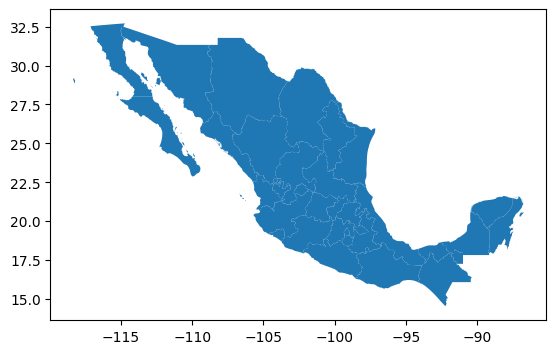

In [6]:
# Se valida

mexican_states.plot()

5.- Carga los datos de la localización de las sucursales de Costco en un DataFrame.


In [7]:
tcdf = gpd.read_file('/content/gdrive/MyDrive/Colab Notebooks/GeoPandas/MexicanStatesFiles/tiendasCostco_.csv')

In [8]:
# Se valida

tcdf.head()

,id,nombre,direccion,ubicacion,latitud,longitud,tel centro llantero,geometry
0,1,"""Puebla""",Blvd. del Niño Poblano 2904,Puebla,19.0334989,-98.23779377,222 2273 318,None
1,2,"""Villa Coapa""",Puente 186,Coapa,19.28435907,-99.13865463,NaN,None
2,3,"""Cuernavaca""",Av. Vicente Guerrero 205,Cuernavaca,18.93448089,-99.23342975,777 7101 523,None
3,4,"""Lindavista""",Av. Insurgentes Norte 1320,Gustavo A. Madero,19.481697,-99.1300626,55 5747 5691,None
4,5,"""Mixcoac""",Blvd. Adolfo López Mateos 1181,Alvaro Obregón,19.38723675,-99.19071826,,None


6.- Convierte los datos de la localización de las sucursales de Costco en un GeoDataFrame, creando Puntos a partir de la longitud y latitud de cada sucursal.

In [9]:
costco = gpd.GeoDataFrame(tcdf, geometry = gpd.points_from_xy(tcdf.longitud, tcdf.latitud))

In [10]:
# Se valida

costco.head()

,id,nombre,direccion,ubicacion,latitud,longitud,tel centro llantero,geometry
0,1,"""Puebla""",Blvd. del Niño Poblano 2904,Puebla,19.0334989,-98.23779377,222 2273 318,POINT (-98.23779 19.03350)
1,2,"""Villa Coapa""",Puente 186,Coapa,19.28435907,-99.13865463,NaN,POINT (-99.13865 19.28436)
2,3,"""Cuernavaca""",Av. Vicente Guerrero 205,Cuernavaca,18.93448089,-99.23342975,777 7101 523,POINT (-99.23343 18.93448)
3,4,"""Lindavista""",Av. Insurgentes Norte 1320,Gustavo A. Madero,19.481697,-99.1300626,55 5747 5691,POINT (-99.13006 19.48170)
4,5,"""Mixcoac""",Blvd. Adolfo López Mateos 1181,Alvaro Obregón,19.38723675,-99.19071826,,POINT (-99.19072 19.38724)


<Axes: >

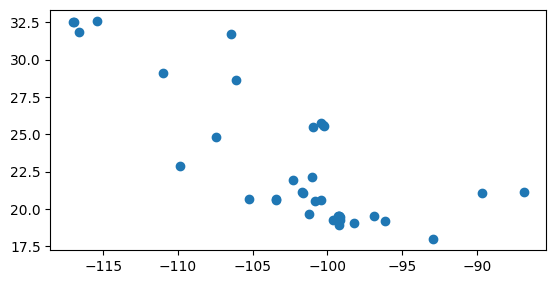

In [11]:
# Se valida

costco.plot()

7.- Agrega una columna a los estados que indique la región a la que pertenecen y separa el GeoDataFrame por regiones en lugar de por estados:

In [12]:
# Se editaron los nombres de algunos Estados para coincidir con el gdf, ejemplo CDMX por Ciudad de México
# Se crea dict

regiones = {
    'Tlaxcala': 'Centro',
    'Puebla': 'Centro',
    'Ciudad de México': 'Centro',
    'Morelos': 'Centro',
    'México': 'Centro',
    'Hidalgo': 'Centro',
    'Jalisco': 'Centro Oeste',
    'Michoacán de Ocampo': 'Centro Oeste',
    'Colima': 'Centro Oeste',
    'Aguascalientes': 'Centro Oeste',
    'Nayarit': 'Centro Oeste',
    'Zacatecas': 'Centro Oeste',
    'San Luis Potosí': 'Centro Oeste',
    'Guanajuato': 'Centro Oeste',
    'Querétaro': 'Centro Oeste',
    'Chihuahua': 'Noreste',
    'Coahuila de Zaragoza': 'Noreste',
    'Nuevo León': 'Noreste',
    'Tamaulipas': 'Noreste',
    'Durango': 'Noreste',
    'Baja California': 'Noroeste',
    'Baja California Sur': 'Noroeste',
    'Sonora': 'Noroeste',
    'Sinaloa': 'Noroeste',
    'Guerrero': 'Sureste',
    'Veracruz de Ignacio de la Llave': 'Sureste',
    'Oaxaca': 'Sureste',
    'Tabasco': 'Sureste',
    'Chiapas': 'Sureste',
    'Campeche': 'Sureste',
    'Yucatán': 'Sureste',
    'Quintana Roo': 'Sureste'
}

In [13]:
# Se valida

regiones

{'Tlaxcala': 'Centro',
 'Puebla': 'Centro',
 'Ciudad de México': 'Centro',
 'Morelos': 'Centro',
 'México': 'Centro',
 'Hidalgo': 'Centro',
 'Jalisco': 'Centro Oeste',
 'Michoacán de Ocampo': 'Centro Oeste',
 'Colima': 'Centro Oeste',
 'Aguascalientes': 'Centro Oeste',
 'Nayarit': 'Centro Oeste',
 'Zacatecas': 'Centro Oeste',
 'San Luis Potosí': 'Centro Oeste',
 'Guanajuato': 'Centro Oeste',
 'Querétaro': 'Centro Oeste',
 'Chihuahua': 'Noreste',
 'Coahuila de Zaragoza': 'Noreste',
 'Nuevo León': 'Noreste',
 'Tamaulipas': 'Noreste',
 'Durango': 'Noreste',
 'Baja California': 'Noroeste',
 'Baja California Sur': 'Noroeste',
 'Sonora': 'Noroeste',
 'Sinaloa': 'Noroeste',
 'Guerrero': 'Sureste',
 'Veracruz de Ignacio de la Llave': 'Sureste',
 'Oaxaca': 'Sureste',
 'Tabasco': 'Sureste',
 'Chiapas': 'Sureste',
 'Campeche': 'Sureste',
 'Yucatán': 'Sureste',
 'Quintana Roo': 'Sureste'}

In [14]:
#  La función "map" busca cada valor en la columna "name" en el diccionario "regiones" y
# asigna el valor correspondiente de la región a la columna "Region" del DataFrame.

mexican_states['Region'] = mexican_states['name'].map(regiones)

In [15]:
# Se valida

mexican_states.head()

,ISO3166-2,admin_leve,boundary,is_in_coun,is_in_co_1,name,name_en,name_es,name_pl,name_ru,name_uk,place,ref,type,wikidata,wikipedia,geometry,Region
0,MX-AGU,4,administrative,México,MX,Aguascalientes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"POLYGON ((-102.74530 21.72005, -102.74859 21.7...",Centro Oeste
1,MX-COL,4,administrative,México,MX,Colima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-103.48859 18.96489, -103.4884...",Centro Oeste
2,MX-TLA,4,administrative,México,MX,Tlaxcala,Tlaxcala,Tlaxcala,Tlaxcala,Тласкала,Тласкала,state,TLA,boundary,Q82681,es:Tlaxcala,"POLYGON ((-98.54150 19.46082, -98.54158 19.460...",Centro
3,MX-CMX,4,administrative,México,MX,Ciudad de México,Mexico City,Ciudad de México,NaN,NaN,NaN,state,DIF,boundary,Q1489,en:Mexico City,"POLYGON ((-99.27870 19.13170, -99.28259 19.138...",Centro
4,MX-MOR,4,administrative,México,MX,Morelos,Morelos,Morelos,Morelos,Морелос,Морелос,state,MOR,boundary,Q66117,es:Morelos,"POLYGON ((-98.90339 19.03848, -98.90061 19.038...",Centro


In [16]:
# Se buscaron errores en la asignación de región, se comenta en líneas anteriores

mexican_states['Region'].isna

<bound method Series.isna of 0     Centro Oeste
1     Centro Oeste
2           Centro
3           Centro
4           Centro
5           Centro
6           Centro
7           Centro
8          Noreste
9          Noreste
10         Noreste
11        Noroeste
12    Centro Oeste
13    Centro Oeste
14    Centro Oeste
15    Centro Oeste
16    Centro Oeste
17         Noreste
18         Noreste
19         Sureste
20         Sureste
21        Noroeste
22         Sureste
23    Centro Oeste
24         Sureste
25         Sureste
26         Sureste
27        Noroeste
28        Noroeste
29    Centro Oeste
30         Sureste
31         Sureste
Name: Region, dtype: object>

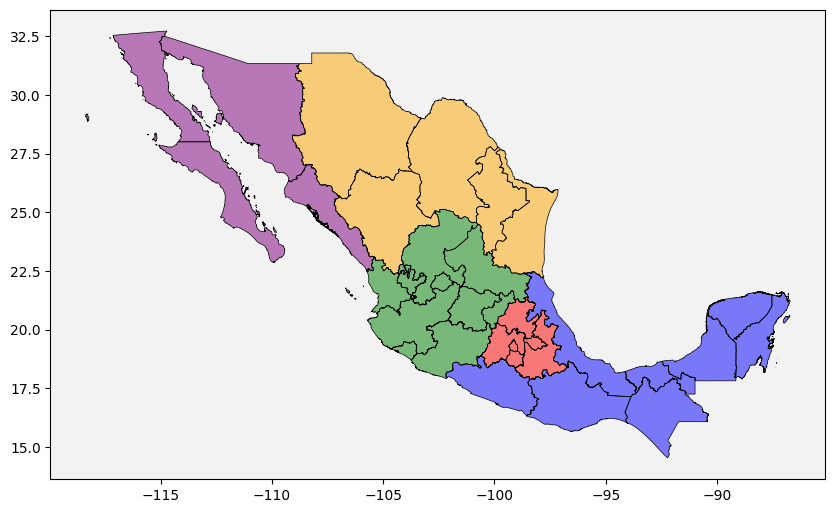

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [17]:
# Ignoramos warnings para mostrar el plot más limpio
warnings.filterwarnings("ignore")

# Separamos los mexican_states por regiones
mx_centro = mexican_states[mexican_states['Region'] == 'Centro'].copy()
mx_centrooeste = mexican_states[mexican_states['Region'] == 'Centro Oeste'].copy()
mx_noreste = mexican_states[mexican_states['Region'] == 'Noreste'].copy()
mx_noroeste = mexican_states[mexican_states['Region'] == 'Noroeste'].copy()
mx_sureste = mexican_states[mexican_states['Region'] == 'Sureste'].copy()

# Crear una nueva figura y ejes
fig, ax = plt.subplots(figsize=(10, 8))

color_gris_claro = '#f2f2f2'

ax.set_facecolor(color_gris_claro)

# Dibujar el borde del mapa todos los Estados pero con las regiones separadas por colores
mexican_states.boundary.plot(ax=ax, color='black', linewidth=0.5)

# Graficar las regiones con transparencia
mx_centro.plot(ax=ax, alpha=0.5, color='red')
mx_centrooeste.plot(ax=ax, alpha=0.5, color='green')
mx_noreste.plot(ax=ax, alpha=0.5, color='orange')
mx_noroeste.plot(ax=ax, alpha=0.5, color='purple')
mx_sureste.plot(ax=ax, alpha=0.5, color='blue')

plt.show()

#Restauramos el warning
warnings.resetwarnings()

8.- Asegura que ambos GeoDataFrames utilicen el CRS epsg=3395 que usa metros como medida de distancia.


In [18]:
costco = costco.set_crs(mexican_states.crs)

mexican_states = mexican_states.to_crs(epsg=3395)


costco = costco.to_crs(epsg=3395)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# Se valida

costco.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
# Se valida

mexican_states.crs

<Projected CRS: EPSG:3395>
Name: WGS 84 / World Mercator
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World between 80°S and 84°N.
- bounds: (-180.0, -80.0, 180.0, 84.0)
Coordinate Operation:
- name: World Mercator
- method: Mercator (variant A)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

9.- Crea un buffer de 120 km alrededor de los puntos de localización de cada sucursal.


In [21]:
costco['geometry'] = costco.buffer(120000)

10.- Grafica la intersección de las regiones con los círculos creados a partir de la localización de las sucursales.

11.- Identifica las regiones en dónde se requiere más cobertura y responde la pregunta:
 ¿En qué regiones del país (centro, centro oeste, noreste, noroeste, sureste) NO es conveniente abrir una nueva sucursal debido a la falta de cobertura de entregas a domicilio?

 (Se incluyen en comentarios de la gráfica)

In [22]:
# Revisat que todos los todos utilicen el mismo CRS (EPSG:3395)
costco = costco.to_crs(epsg=3395)
mexican_states = mexican_states.to_crs(epsg=3395)
mx_centro = mx_centro.to_crs(epsg=3395)
mx_centrooeste = mx_centrooeste.to_crs(epsg=3395)
mx_noreste = mx_noreste.to_crs(epsg=3395)
mx_noroeste = mx_noroeste.to_crs(epsg=3395)
mx_sureste = mx_sureste.to_crs(epsg=3395)

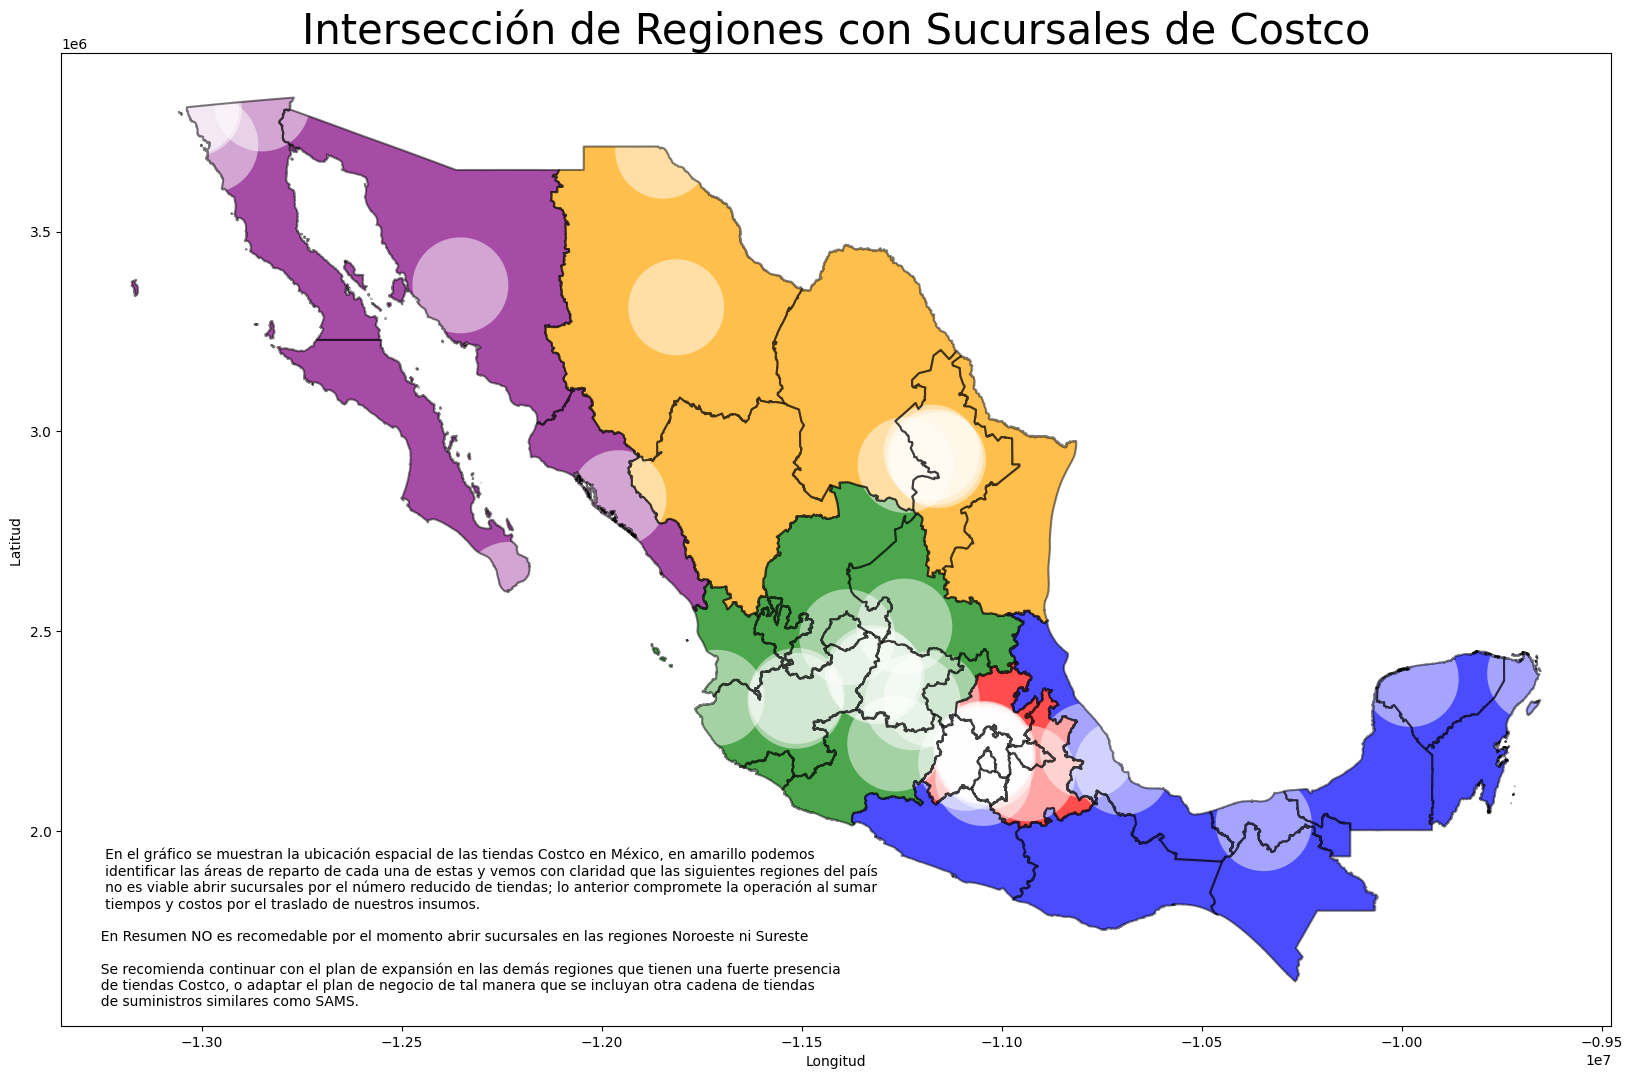

In [91]:
# Calcula la intersección entre los buffers y los polígonos de las regiones
interseccion = gpd.overlay(mexican_states, costco, how='intersection')

# Crea una nueva figura y ejes
fig, ax = plt.subplots(figsize=(20,20))

# Dibujar el borde del mapa todos los Estados pero con las regiones separadas por colores
mexican_states.boundary.plot(ax=ax, color='black', alpha = 0.5, linewidth=1.5)

# Graficar las regiones con transparencia
mx_centro.plot(ax=ax, alpha=0.7, color='red', label = 'Centro')
mx_centrooeste.plot(ax=ax, alpha=0.7, color='green')
mx_noreste.plot(ax=ax, alpha=0.7, color='orange')
mx_noroeste.plot(ax=ax, alpha=0.7, color='purple')
mx_sureste.plot(ax=ax, alpha=0.7, color='blue')

# Graficar la intersección de las regiones con los círculos
interseccion.plot(ax=ax, color='white', alpha=0.5)

# Etiquetas
plt.title('Intersección de Regiones con Sucursales de Costco', fontsize=30)
plt.xlabel('Longitud')
plt.ylabel('Latitud ')

# Agregamos comentarios
comentarios = '''   En el gráfico se muestran la ubicación espacial de las tiendas Costco en México, en amarillo podemos
   identificar las áreas de reparto de cada una de estas y vemos con claridad que las siguientes regiones del país
   no es viable abrir sucursales por el número reducido de tiendas; lo anterior compromete la operación al sumar
   tiempos y costos por el traslado de nuestros insumos.

  En Resumen NO es recomedable por el momento abrir sucursales en las regiones Noroeste ni Sureste

  Se recomienda continuar con el plan de expansión en las demás regiones que tienen una fuerte presencia
  de tiendas Costco, o adaptar el plan de negocio de tal manera que se incluyan otra cadena de tiendas
  de suministros similares como SAMS.'''

ax.text(0.02, 0.02, comentarios, transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.0))

plt.show()
